In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('Agricultura-Sonora-Cereales.xlsx')
df.head()

,ANO,CIERREYAVAN,CICLO,CDDR,NDDR,CMUN,NMUN,CVECUL,CULTIVO,SUPSEM,SUPCOSE,SUPSINI,PRODTON,RENDMNTO,PMR,VALPROD,TIPO DE CLASIFICACIÓN
0,1999,CIERRE DE PRODUCCION AGRICOLA 1999,1,141,DDR 141 AGUA PRIETA,2,Agua Prieta,51,Trigo grano,29.0,29.0,0.0,86.0,2.97,1300.0,111.80,Cereales
1,1999,CIERRE DE PRODUCCION AGRICOLA 1999,1,139,DDR 139 CABORCA,17,Caborca,51,Trigo grano,15267.0,15252.0,15.0,109935.0,7.21,1396.6,153535.22,Cereales
2,1999,CIERRE DE PRODUCCION AGRICOLA 1999,1,148,DDR 148 CAJEME,18,Cajeme,33,Maíz grano,39258.0,37475.0,1783.0,211524.0,5.64,1320.0,279211.68,Cereales
3,1999,CIERRE DE PRODUCCION AGRICOLA 1999,1,148,DDR 148 CAJEME,18,Cajeme,47,Sorgo grano,43.0,0.0,43.0,0.0,0.00,0.0,0.00,Cereales
4,1999,CIERRE DE PRODUCCION AGRICOLA 1999,1,148,DDR 148 CAJEME,18,Cajeme,51,Trigo grano,116200.0,116200.0,0.0,701141.0,6.03,1360.0,953551.76,Cereales


In [ ]:
df.shape

(2437, 17)

In [ ]:
df.columns

Index(['ANO', 'CIERREYAVAN', 'CICLO', 'CDDR', 'NDDR', 'CMUN', 'NMUN', 'CVECUL',
       'CULTIVO', 'SUPSEM', 'SUPCOSE', 'SUPSINI', 'PRODTON', 'RENDMNTO', 'PMR',
       'VALPROD', 'TIPO DE CLASIFICACIÓN'],
      dtype='object')

In [ ]:
# dropped_columns = ['CIERREYAVAN', 'NDDR', 'NMUN', 'CULTIVO', 'RENDMNTO', 'PMR', 'VALPROD', 'TIPO DE CLASIFICACIÓN']
dropped_columns = ['CIERREYAVAN', 'NDDR', 'CMUN', 'CVECUL', 'RENDMNTO', 'PMR', 'VALPROD', 'TIPO DE CLASIFICACIÓN']
df = df.drop(dropped_columns, axis=1)
df.head()

,ANO,CICLO,CDDR,NMUN,CULTIVO,SUPSEM,SUPCOSE,SUPSINI,PRODTON
0,1999,1,141,Agua Prieta,Trigo grano,29.0,29.0,0.0,86.0
1,1999,1,139,Caborca,Trigo grano,15267.0,15252.0,15.0,109935.0
2,1999,1,148,Cajeme,Maíz grano,39258.0,37475.0,1783.0,211524.0
3,1999,1,148,Cajeme,Sorgo grano,43.0,0.0,43.0,0.0
4,1999,1,148,Cajeme,Trigo grano,116200.0,116200.0,0.0,701141.0


### Analisis Exploratorio

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2437 entries, 0 to 2436
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ANO      2437 non-null   int64  
 1   CICLO    2437 non-null   int64  
 2   CDDR     2437 non-null   int64  
 3   NMUN     2437 non-null   object 
 4   CULTIVO  2437 non-null   object 
 5   SUPSEM   2437 non-null   float64
 6   SUPCOSE  2437 non-null   float64
 7   SUPSINI  2437 non-null   float64
 8   PRODTON  2437 non-null   float64
dtypes: float64(4), int64(3), object(2)
memory usage: 171.5+ KB


In [ ]:
df.describe()

,ANO,CICLO,CDDR,SUPSEM,SUPCOSE,SUPSINI,PRODTON
count,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000,2437.000000,2.437000e+03
mean,2011.236767,1.539598,145.791957,3038.504932,2990.229865,48.271559,1.806220e+04
std,6.059312,0.498532,8.128017,10324.450613,10313.092855,395.777491,6.331336e+04
min,1999.000000,1.000000,139.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2006.000000,1.000000,142.000000,21.000000,20.000000,0.000000,6.400000e+01
50%,2011.000000,2.000000,144.000000,102.000000,98.480000,0.000000,3.655000e+02
75%,2017.000000,2.000000,148.000000,1040.000000,956.000000,0.000000,4.303040e+03
max,2023.000000,2.000000,193.000000,191451.000000,191451.000000,8500.000000,1.100268e+06


In [ ]:
df.shape

(2437, 9)

In [ ]:
df.isna().sum()

ANO        0
CICLO      0
CDDR       0
NMUN       0
CULTIVO    0
SUPSEM     0
SUPCOSE    0
SUPSINI    0
PRODTON    0
dtype: int64

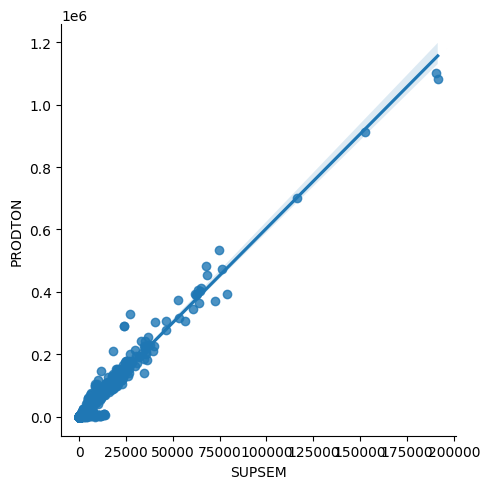

In [ ]:
# Grafica de regresion utilizando Seaborn en vez de matplotlib
sns.lmplot(x='SUPSEM', y='PRODTON', data=df)

In [ ]:
cormat_columns = ['ANO', 'CICLO', 'CDDR', 'SUPSEM', 'SUPCOSE', 'SUPSINI', 'PRODTON']
cormat_df = df[cormat_columns]

              ANO     CICLO      CDDR    SUPSEM   SUPCOSE   SUPSINI   PRODTON
ANO      1.000000 -0.012142  0.045119 -0.045041 -0.042285 -0.073124 -0.012285
CICLO   -0.012142  1.000000 -0.052318 -0.262885 -0.262333 -0.021943 -0.285695
CDDR     0.045119 -0.052318  1.000000  0.135119  0.133839  0.037219  0.133845
SUPSEM  -0.045041 -0.262885  0.135119  1.000000  0.999265  0.047825  0.984921
SUPCOSE -0.042285 -0.262333  0.133839  0.999265  1.000000  0.009501  0.986042
SUPSINI -0.073124 -0.021943  0.037219  0.047825  0.009501  1.000000 -0.000975
PRODTON -0.012285 -0.285695  0.133845  0.984921  0.986042 -0.000975  1.000000


<Axes: >

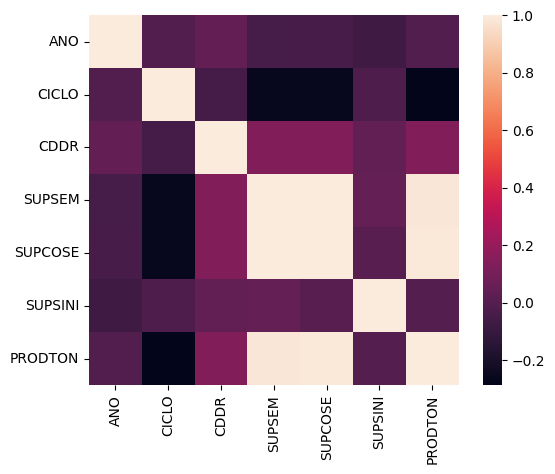

In [ ]:
# Matriz de correlacion
cormat = cormat_df.corr()

print(cormat)

# Grafica de correlacion
sns.heatmap(cormat, vmax=1, square=True)

In [ ]:
# Seleccionando las variables que vamos a graficar
grid_columns = ['CVECUL', 'SUPSEM', 'SUPSINI', 'PRODTON']
dfGrid = df[grid_columns]

# Grafica de cuadricula
pd.plotting.scatter_matrix(dfGrid, figsize=(12.0,12.0))

KeyError: "['CVECUL'] not in index"

In [ ]:
df.columns

Index(['ANO', 'CICLO', 'CDDR', 'CMUN', 'CVECUL', 'SUPSEM', 'SUPCOSE',
       'SUPSINI', 'PRODTON'],
      dtype='object')

In [ ]:
df[df['ANO']==1999].shape

(38, 9)

In [ ]:
for año in range(1999, 2024):
    # Realizar la consulta para el año actual
    df_year = df[df['ANO'] == año]

    # Mostrar el tamaño del DataFrame para el año actual
    print(f"Año {año}: {df_year.shape}")

Año 1999: (38, 9)
Año 2000: (39, 9)
Año 2001: (37, 9)
Año 2002: (37, 9)
Año 2003: (127, 9)
Año 2004: (116, 9)
Año 2005: (120, 9)
Año 2006: (123, 9)
Año 2007: (137, 9)
Año 2008: (119, 9)
Año 2009: (127, 9)
Año 2010: (129, 9)
Año 2011: (118, 9)
Año 2012: (118, 9)
Año 2013: (112, 9)
Año 2014: (111, 9)
Año 2015: (115, 9)
Año 2016: (96, 9)
Año 2017: (115, 9)
Año 2018: (120, 9)
Año 2019: (127, 9)
Año 2020: (114, 9)
Año 2021: (135, 9)
Año 2022: (5, 9)
Año 2023: (2, 9)


####  Los años de 2022 y 2023 apenas tienen datos, lo que en la visualización de columnas, como la producción por toneladas, muestra una caída muy grande. Es por esto que se decidirá trabajar con los datos de 1999 hasta 2021.

In [ ]:
# Agrupar por año y tipo de cultivo, sumando la producción y el valor producido
grouped_df = df.groupby(['ANO']).agg({'PRODTON': 'sum'}).reset_index()


# Renombrar las columnas
grouped_df.columns = ['Año', 'Producción total']

# Visualizar el nuevo DataFrame
print(grouped_df.head())

    Año  Producción total
0  1999        1591860.00
1  2000        1729741.00
2  2001        1643587.00
3  2002        1878308.80
4  2003        1585224.24


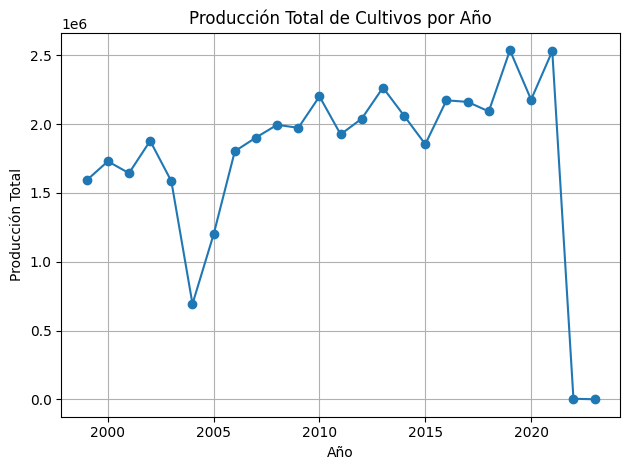

In [ ]:
# Graficar la producción total en función del año
plt.plot(grouped_df['Año'], grouped_df['Producción total'], marker='o', linestyle='-')

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Producción Total')
plt.title('Producción Total de Cultivos por Año')

# Mostrar la gráfica
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
dfAñosInc = df[df['ANO']>2021]

In [ ]:
dfAñosInc

,ANO,CICLO,CDDR,NMUN,CULTIVO,SUPSEM,SUPCOSE,SUPSINI,PRODTON
2430,2022,1,139,Altar,Trigo grano,126.0,126.0,0.0,730.0
2431,2023,1,139,Altar,Trigo grano,115.0,115.0,0.0,632.0
2432,2022,1,139,Átil,Trigo grano,23.0,23.0,0.0,117.0
2433,2023,1,139,Átil,Trigo grano,10.0,10.0,0.0,55.0
2434,2022,2,139,Caborca,Maíz grano,0.0,0.0,0.0,0.0
2435,2022,2,139,Caborca,Sorgo grano,0.0,0.0,0.0,0.0
2436,2022,1,139,Caborca,Trigo grano,622.0,622.0,0.0,3700.0


In [ ]:
saveas = 'Datos de Prueba.xlsx'
dfAñosInc.to_excel(saveas, index=False)

In [ ]:
df = df.loc[df['ANO'] <= 2021]

In [ ]:
df.describe()

,ANO,CICLO,CDDR,SUPSEM,SUPCOSE,SUPSINI,PRODTON
count,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2.430000e+03
mean,2011.204938,1.540329,145.811523,3046.889103,2998.474971,48.410613,1.811207e+04
std,6.038846,0.498473,8.131527,10338.126607,10326.790182,396.338869,6.339765e+04
min,1999.000000,1.000000,139.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2006.000000,1.000000,142.000000,21.250000,20.000000,0.000000,6.405000e+01
50%,2011.000000,2.000000,144.000000,102.500000,98.740000,0.000000,3.663950e+02
75%,2017.000000,2.000000,148.000000,1047.500000,962.750000,0.000000,4.332750e+03
max,2021.000000,2.000000,193.000000,191451.000000,191451.000000,8500.000000,1.100268e+06


#### NOTA: Modelado: Utiliza técnicas de modelado como la regresión lineal, regresión logística u otros modelos de aprendizaje automático para predecir la producción de cultivos en futuros años. Puedes construir modelos separados para cada ciudad o utilizar modelos de regresión con variables categóricas para modelar las diferencias entre ciudades.

---




In [ ]:
for mun in range(1, 72):
    # Realizar la consulta para el municipio actual
    df_mun = df[df['CMUN'] == mun]

    # Mostrar el tamaño del DataFrame para el municipio actual
    print(f"Municipio {mun}: {df_mun.shape}")

Municipio 1: (52, 9)
Municipio 2: (21, 9)
Municipio 3: (38, 9)
Municipio 4: (27, 9)
Municipio 5: (18, 9)
Municipio 6: (42, 9)
Municipio 7: (22, 9)
Municipio 8: (10, 9)
Municipio 9: (19, 9)
Municipio 10: (22, 9)
Municipio 11: (13, 9)
Municipio 12: (78, 9)
Municipio 13: (43, 9)
Municipio 14: (47, 9)
Municipio 15: (37, 9)
Municipio 16: (4, 9)
Municipio 17: (49, 9)
Municipio 18: (121, 9)
Municipio 19: (3, 9)
Municipio 20: (8, 9)
Municipio 21: (0, 9)
Municipio 22: (9, 9)
Municipio 23: (41, 9)
Municipio 24: (15, 9)
Municipio 25: (51, 9)
Municipio 26: (146, 9)
Municipio 27: (24, 9)
Municipio 28: (17, 9)
Municipio 29: (124, 9)
Municipio 30: (80, 9)
Municipio 31: (13, 9)
Municipio 32: (20, 9)
Municipio 33: (85, 9)
Municipio 34: (48, 9)
Municipio 35: (15, 9)
Municipio 36: (28, 9)
Municipio 37: (7, 9)
Municipio 38: (38, 9)
Municipio 39: (0, 9)
Municipio 40: (9, 9)
Municipio 41: (0, 9)
Municipio 42: (164, 9)
Municipio 43: (8, 9)
Municipio 44: (0, 9)
Municipio 45: (52, 9)
Municipio 46: (17, 9)
Muni

####  42 = Navojoa, el municipio con más registros.

##  Analisis por DDR

In [ ]:
valores_cddr = df['CDDR'].unique()

for cddr in valores_cddr:
    # Aquí puedes realizar cualquier operación que necesites con cada valor de CDDR
    print("Valor de CDDR:", cddr)
    # Por ejemplo, podrías filtrar el dataframe para obtener solo las filas con el valor de CDDR actual
    df_filtrado = df[df['CDDR'] == cddr]

Valor de CDDR: 141
Valor de CDDR: 139
Valor de CDDR: 148
Valor de CDDR: 147
Valor de CDDR: 144
Valor de CDDR: 140
Valor de CDDR: 145
Valor de CDDR: 143
Valor de CDDR: 149
Valor de CDDR: 142
Valor de CDDR: 146
Valor de CDDR: 193


In [ ]:
valores_DDR = df['CDDR'].unique()
for DDR in valores_DDR:
    # Realizar la consulta para el municipio actual
    df_DDR = df[df['CDDR'] == DDR]

    # Mostrar el tamaño del DataFrame para el municipio actual
    print(f"DDR {DDR}: {df_DDR.shape}")

DDR 141: (61, 9)
DDR 139: (224, 9)
DDR 148: (620, 9)
DDR 147: (126, 9)
DDR 144: (105, 9)
DDR 140: (130, 9)
DDR 145: (8, 9)
DDR 143: (254, 9)
DDR 149: (305, 9)
DDR 142: (458, 9)
DDR 146: (81, 9)
DDR 193: (58, 9)


##  148 = Cajeme, el DDR con más registros.

In [ ]:
dfCajeme = df.loc[df['CDDR'] == 148]
dfCajeme

,ANO,CICLO,CDDR,NMUN,CULTIVO,SUPSEM,SUPCOSE,SUPSINI,PRODTON
2,1999,1,148,Cajeme,Maíz grano,39258.0,37475.0,1783.0,211524.0
3,1999,1,148,Cajeme,Sorgo grano,43.0,0.0,43.0,0.0
4,1999,1,148,Cajeme,Trigo grano,116200.0,116200.0,0.0,701141.0
20,1999,2,148,Cajeme,Maíz grano,687.0,687.0,0.0,2065.0
21,1999,2,148,Cajeme,Sorgo grano,4715.0,4715.0,0.0,3773.0
...,...,...,...,...,...,...,...,...,...
2412,2021,2,148,Rosario,Sorgo grano,1000.0,1000.0,0.0,2300.0
2417,2021,2,148,San Ignacio Río Muerto,Maíz grano,9.0,9.0,0.0,80.1
2418,2021,1,148,San Ignacio Río Muerto,Maíz grano,11905.0,11905.0,0.0,145991.5
2419,2021,1,148,San Ignacio Río Muerto,Trigo grano,1568.0,1568.0,0.0,10819.2


# ❗❗ COMIENZA PRUEBAS DE MODELO CON DDR

---

In [ ]:
#   Any text column that we have, we want to do a dummy one-hot encoding.
dfCajeme = pd.get_dummies(dfCajeme, dtype=int, drop_first = True)
dfCajeme.head()

,ANO,CICLO,CDDR,SUPSEM,SUPCOSE,SUPSINI,PRODTON,NMUN_Bácum,NMUN_Cajeme,NMUN_Etchojoa,...,NMUN_Rosario,NMUN_San Ignacio Río Muerto,CULTIVO_Avena grano,CULTIVO_Cebada grano,CULTIVO_Maíz grano,CULTIVO_Sorgo escobero,CULTIVO_Sorgo grano,CULTIVO_Trigo grano,CULTIVO_Trigo grano semilla,CULTIVO_Triticale grano
2,1999,1,148,39258.0,37475.0,1783.0,211524.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1999,1,148,43.0,0.0,43.0,0.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,1999,1,148,116200.0,116200.0,0.0,701141.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
20,1999,2,148,687.0,687.0,0.0,2065.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
21,1999,2,148,4715.0,4715.0,0.0,3773.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
dfCajeme['CICLO'].unique()

array([1, 2])

##  En Cajeme no hay ciclo perenne

In [ ]:
dfCajeme['CICLO'] = dfCajeme['CICLO'].astype(int)

# Luego, usa pd.get_dummies() para convertir la columna 'CICLO' en variables dummy
df_dummy_ciclo = pd.get_dummies(dfCajeme['CICLO'], prefix='CICLO', dtype=int)

# Finalmente, concatena las variables dummy al dataframe original
dfCajeme = pd.concat([dfCajeme, df_dummy_ciclo], axis=1)

# Elimina la columna original 'CICLO' si deseas
# dfCAJEME.drop('CICLO', axis=1, inplace=True)

# Muestra el resultado
dfCajeme.head()

,ANO,CICLO,CDDR,SUPSEM,SUPCOSE,SUPSINI,PRODTON,NMUN_Bácum,NMUN_Cajeme,NMUN_Etchojoa,...,CULTIVO_Avena grano,CULTIVO_Cebada grano,CULTIVO_Maíz grano,CULTIVO_Sorgo escobero,CULTIVO_Sorgo grano,CULTIVO_Trigo grano,CULTIVO_Trigo grano semilla,CULTIVO_Triticale grano,CICLO_1,CICLO_2
2,1999,1,148,39258.0,37475.0,1783.0,211524.0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,1999,1,148,43.0,0.0,43.0,0.0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,1999,1,148,116200.0,116200.0,0.0,701141.0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
20,1999,2,148,687.0,687.0,0.0,2065.0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
21,1999,2,148,4715.0,4715.0,0.0,3773.0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
dfCajeme = dfCajeme.drop('CICLO', axis=1)

In [ ]:
dfCajeme = dfCajeme.drop('CDDR', axis=1)
dfCajeme.head()

,ANO,SUPSEM,SUPCOSE,SUPSINI,PRODTON,NMUN_Bácum,NMUN_Cajeme,NMUN_Etchojoa,NMUN_Guaymas,NMUN_Navojoa,...,CULTIVO_Avena grano,CULTIVO_Cebada grano,CULTIVO_Maíz grano,CULTIVO_Sorgo escobero,CULTIVO_Sorgo grano,CULTIVO_Trigo grano,CULTIVO_Trigo grano semilla,CULTIVO_Triticale grano,CICLO_1,CICLO_2
2,1999,39258.0,37475.0,1783.0,211524.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1999,43.0,0.0,43.0,0.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1999,116200.0,116200.0,0.0,701141.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
20,1999,687.0,687.0,0.0,2065.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
21,1999,4715.0,4715.0,0.0,3773.0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


#  ❗❗ TERMINAN PRUEBAS DE MODELO CON DDR

---



### Modelo OLS

In [ ]:
X = dfCajeme.drop('PRODTON', axis=1)
y = dfCajeme['PRODTON']

In [ ]:
X.shape

(620, 22)

In [ ]:
y.shape

(620,)

In [ ]:
#Normalizar los datos
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X)
# X_scaled = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
modelo_regresion = sm.OLS(y, X).fit()

In [ ]:
print(modelo_regresion.summary())

                            OLS Regression Results                            
Dep. Variable:                PRODTON   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1485.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:07:36   Log-Likelihood:                -6831.6
No. Observations:                 620   AIC:                         1.371e+04
Df Residuals:                     598   BIC:                         1.380e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
ANO               

In [ ]:
# Recorre los coeficientes del modelo y selecciona las variables con un valor p inferior a 0.05.
coeficientes = modelo_regresion.params
coeficientes

ANO                            1.049307e+03
SUPSEM                         7.825474e+03
SUPCOSE                       -7.819488e+03
SUPSINI                       -7.829806e+03
NMUN_Bácum                     2.682491e+02
NMUN_Cajeme                    5.705864e+03
NMUN_Etchojoa                 -1.180858e+03
NMUN_Guaymas                  -3.888149e+03
NMUN_Navojoa                  -5.511893e+03
NMUN_Quiriego                 -4.581671e+03
NMUN_Rosario                  -4.754402e+03
NMUN_San Ignacio Río Muerto    9.771150e+02
CULTIVO_Avena grano           -5.055713e+03
CULTIVO_Cebada grano          -5.924104e+03
CULTIVO_Maíz grano             2.305309e+03
CULTIVO_Sorgo escobero         1.111587e+04
CULTIVO_Sorgo grano           -2.517231e+03
CULTIVO_Trigo grano           -3.139905e+03
CULTIVO_Trigo grano semilla   -1.609088e+04
CULTIVO_Triticale grano       -6.588724e+03
CICLO_1                       -2.102087e+06
CICLO_2                       -2.112550e+06
dtype: float64

In [ ]:
coeficientes_filtrados = []
for value in coeficientes:
  if value <0.05:
    coeficientes_filtrados.append(value)

print(coeficientes_filtrados)

[-7819.487971592876, -7829.806488023445, -1180.8583886287324, -3888.1489123800056, -5511.893054087846, -4581.671103088221, -4754.402400785968, -5055.713035723253, -5924.104223582428, -2517.231231746363, -3139.9045986962847, -16090.881837743473, -6588.724027489673, -2102086.7316921614, -2112550.327024147]


In [ ]:
variables_significativas = []
for i in range(len(modelo_regresion.params)):
  if modelo_regresion.pvalues[i] < 0.05:
    variables_significativas.append(dfCajeme.columns[i])
print(variables_significativas)

['ANO', 'SUPSEM', 'SUPCOSE', 'SUPSINI', 'NMUN_Bácum', 'NMUN_Guaymas', 'CULTIVO_Triticale grano', 'CICLO_1']


### Solamente se eliminó el CDDR

In [ ]:
X_seleccionado = df[variables_significativas].values

In [ ]:
modelo_regresion_significativo = sm.OLS(y, X_seleccionado).fit()

In [ ]:
print(modelo_regresion_significativo.summary())

                                 OLS Regression Results                                
Dep. Variable:                PRODTON   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                          1.410e+04
Date:                Fri, 19 Apr 2024   Prob (F-statistic):                        0.00
Time:                        23:17:20   Log-Likelihood:                         -25878.
No. Observations:                2430   AIC:                                  5.177e+04
Df Residuals:                    2423   BIC:                                  5.181e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
residuos = modelo_regresion.resid
suma_residuos = sum(residuos)
suma_residuos

-0.00012425135173543822

In [ ]:
residuos

2       -8555.855683
3        1520.568562
4        7551.068950
20       4928.089319
21     -12652.065474
            ...     
2412    -4512.395875
2417   -11354.452175
2418    52886.592541
2419   -14965.554496
2420    -6552.483815
Length: 620, dtype: float64

##  Gradiente Descendiente

In [ ]:
#Normalizar los datos
# Primero se escala, luego se divide
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[-2.14092945,  1.832904  ,  1.73405825, ..., -0.18723897,
         0.84983659, -0.84983659],
       [-2.14092945, -0.41014049, -0.4094707 , ..., -0.18723897,
         0.84983659, -0.84983659],
       [-2.14092945,  6.23388142,  6.237042  , ..., -0.18723897,
         0.84983659, -0.84983659],
       ...,
       [ 1.54715816,  0.26834972,  0.27148226, ..., -0.18723897,
         0.84983659, -0.84983659],
       [ 1.54715816, -0.32291257, -0.31978282, ..., -0.18723897,
         0.84983659, -0.84983659],
       [ 1.54715816, -0.41157046, -0.40844112, ..., -0.18723897,
        -1.17669681,  1.17669681]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
RLM = LinearRegression()
RLM.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression
RLM = LinearRegression()
RLM.fit(X_train, y_train)
# Predicciones del modelo de regresion para los conjuntos de entrenamiento y prueba
y_train_pred = RLM.predict(X_train)
y_test_pred = RLM.predict(X_test)

# Importar metricas porque las normales solo aplican para el conjunto de prueba.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Analizamos el modelo de regresion lineal
print('Coeficientes e intercepto', RLM.coef_, RLM.intercept_)
print('Puntaje de entrenamiento con R2', r2_score(y_train, y_train_pred))
print('Puntaje de prueba con R2', r2_score(y_test, y_test_pred))

In [ ]:
# Importar metricas porque las normales solo aplican para el conjunto de prueba.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Analizamos el modelo de regresion lineal
print('Coeficientes e intercepto', RLM.coef_, RLM.intercept_)
print('Puntaje de entrenamiento con R2', r2_score(y_train, y_train_pred))
print('Puntaje de prueba con R2', r2_score(y_test, y_test_pred))

Coeficientes e intercepto [ 7.25692534e+03  1.24803271e+08 -1.24698413e+08 -2.37077447e+06
  4.11553060e+02  3.41036119e+03 -1.46408551e+02 -1.06583255e+03
 -1.72732076e+03 -6.40901731e+02 -9.76553190e+02  6.50491849e+02
 -5.48304015e+02 -9.93105264e+02  9.28902358e+02  4.48663149e+02
 -1.14377179e+03 -1.78926165e+03 -3.11704272e+03 -1.41565849e+03
  3.18829153e+03 -3.18829167e+03] 46371.749238271404
Puntaje de entrenamiento con R2 0.980347752142695
Puntaje de prueba con R2 0.9827944464094801


In [ ]:
print(y_train,  y_train_pred)

1430         39.00
1089        924.00
1787     453818.45
1823       2900.00
1901      33546.10
           ...    
1167          0.00
43      1082542.00
1520     151070.80
794        2710.00
2209      15000.00
Name: PRODTON, Length: 434, dtype: float64 [ 4.23756879e+03  7.03354047e+03  4.27387789e+05 -4.35568166e+02
  4.33750767e+04  7.90245934e+03 -2.47593173e+03  4.71892755e+05
  1.00568739e+04  2.72382096e+04  5.19079096e+03  2.06220175e+04
  5.14055679e+03  1.37787783e+03  6.16065634e+04  1.87185097e+04
 -4.10695523e+03 -4.78783664e+03  3.11453217e+04 -9.83072611e+02
  5.09546820e+04 -1.22074116e+04  2.94039750e+03 -2.73734144e+02
 -4.25088184e+03 -3.04633523e+02  6.64762852e+04  5.66164467e+04
 -2.20592297e+03  1.25405703e+04  2.35663960e+02  9.38526591e+03
 -8.99292062e+03  5.88237466e+04  1.77537496e+04  2.61092003e+04
  3.01398331e+04  7.95212696e+04 -6.06831981e+03  2.13338123e+03
  3.81147006e+03 -1.52651236e+03  2.05738349e+04 -2.58906958e+03
  1.95880754e+04  1.17426789e+04 

In [ ]:
print('MSE de entrenamiento: ', mean_squared_error(y_train, y_train_pred))
print('MSE de prueba: ', mean_squared_error(y_test, y_test_pred))

MSE de entrenamiento:  244944686.79956996
MSE de prueba:  163965812.62477148


### Curva de aprendizaje

---



In [ ]:
# Curva de aprendizaje R2
train_scores = []
test_scores = []
# Creamos dos listas vacías para almacenar los MSE
train_mse = []
test_mse = []

In [ ]:
for train_size in range(10, 100, 10):
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=1-train_size/100, random_state=0)
  model = LinearRegression()
  model.fit(X_train, y_train)
  # Calculamos y almacenamos el MSE y r2 para el conjunto de entrenamiento y el conjunto de prueba
  train_mse.append(mean_squared_error(y_train, model.predict(X_train)))
  test_mse.append(mean_squared_error(y_test, model.predict(X_test)))
  train_scores.append(r2_score(y_train, model.predict(X_train)))
  test_scores.append(r2_score(y_test, model.predict(X_test)))

In [ ]:
print(y_train, model.predict(X_train))

1541     137566.1
1295         50.0
2245      53815.8
42          398.0
1715      27022.7
          ...    
1167          0.0
43      1082542.0
1520     151070.8
794        2710.0
2209      15000.0
Name: PRODTON, Length: 558, dtype: float64 [ 1.41780075e+05  8.02456834e+03  6.53816452e+04  7.56434152e+02
  3.55350409e+04  6.58418400e+04  1.06095228e+05  8.80675274e+02
  2.65856487e+03  9.21924795e+04  1.52369188e+05  3.82829434e+05
  5.60170560e+04  4.22447864e+04  7.01884828e+03 -3.70858434e+03
  6.03271093e+04 -1.10447517e+04  8.61453415e+03  2.97891933e+05
  8.23421434e+03 -3.01282096e+03 -1.45042427e+03  3.28835107e+04
  2.05832611e+04  1.09093162e+04  2.26983761e+04  4.24240101e+04
  6.43264122e+03 -3.93697055e+03  2.87281320e+04  1.82994060e+04
  8.18593982e+03  6.04620833e+03 -1.36457108e+04  8.36196818e+04
  3.83873665e+01 -6.96165383e+02 -1.07581887e+04  8.14656154e+03
  7.39330214e+04  1.02539201e+05  1.62737522e+04  1.83109279e+05
  2.91995465e+04  5.56787508e+04  2.27063057

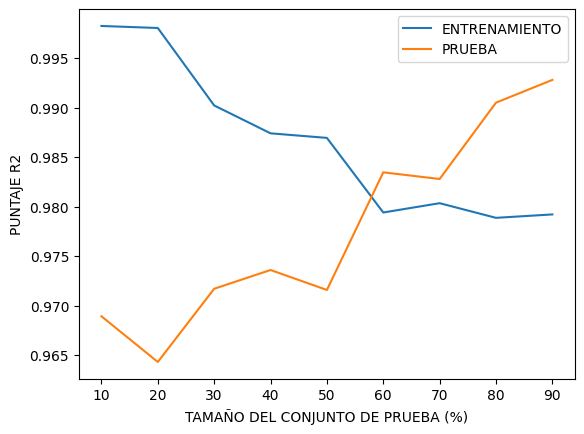

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(10, 100, 10), train_scores, label='ENTRENAMIENTO')
plt.plot(range(10, 100, 10), test_scores, label='PRUEBA')
plt.xlabel('TAMAÑO DEL CONJUNTO DE PRUEBA (%)')
plt.ylabel('PUNTAJE R2')
plt.legend()
plt.show()

### Puesta a prueba

In [ ]:
dfCajeme.mean()

ANO                             2011.770968
SUPSEM                          7213.459355
SUPCOSE                         7158.715806
SUPSINI                           54.735484
PRODTON                        45701.182774
NMUN_Bácum                         0.125806
NMUN_Cajeme                        0.195161
NMUN_Etchojoa                      0.109677
NMUN_Guaymas                       0.079032
NMUN_Navojoa                       0.096774
NMUN_Quiriego                      0.067742
NMUN_Rosario                       0.082258
NMUN_San Ignacio Río Muerto        0.125806
CULTIVO_Avena grano                0.004839
CULTIVO_Cebada grano               0.009677
CULTIVO_Maíz grano                 0.438710
CULTIVO_Sorgo escobero             0.001613
CULTIVO_Sorgo grano                0.235484
CULTIVO_Trigo grano                0.248387
CULTIVO_Trigo grano semilla        0.025806
CULTIVO_Triticale grano            0.033871
CICLO_1                            0.580645
CICLO_2                         

In [ ]:
print('PROMEDIO REAL')

In [ ]:
testData.columns

Index(['ANO', 'SUPSEM', 'SUPCOSE', 'SUPSINI', 'NMUN_Bácum', 'NMUN_Cajeme',
       'NMUN_Etchojoa', 'NMUN_Guaymas', 'NMUN_Navojoa', 'NMUN_Quiriego',
       'NMUN_Rosario', 'NMUN_San Ignacio Río Muerto', 'CULTIVO_Avena grano',
       'CULTIVO_Cebada grano', 'CULTIVO_Maíz grano', 'CULTIVO_Sorgo escobero',
       'CULTIVO_Sorgo grano', 'CULTIVO_Trigo grano',
       'CULTIVO_Trigo grano semilla', 'CULTIVO_Triticale grano', 'CICLO_1',
       'CICLO_2'],
      dtype='object')

In [ ]:
data2 = data = {
    'ANO': [2022],
    'CICLO': [2],
    'CDDR': [148],
    'NMUN': ['San Ignacio Río Muerto'],
    'CULTIVO': ['Maíz Grano'],
    'SUPSEM': [6000],
    'SUPCOSE': [5915],
    'SUPSINI': [85]
}


In [ ]:
testData2 = pd.DataFrame(data2)
testData2

,ANO,CICLO,CDDR,NMUN,CULTIVO,SUPSEM,SUPCOSE,SUPSINI
0,2022,2,148,San Ignacio Río Muerto,Maíz Grano,6000,5915,85


In [ ]:
testData2 = testData2.rename(columns={'NMUN': 'NMUN_San Ignacio Río Muerto'})

In [ ]:
testData2 = testData2.rename(columns={'CULTIVO': 'CULTIVO_Maíz Grano'})

In [ ]:
testData2 = testData2.rename(columns={'CICLO': 'CICLO_2'})

In [ ]:
testData2['CULTIVO_Maíz Grano'] = 1

In [ ]:
testData2['NMUN_San Ignacio Río Muerto'] = 1
testData2['CICLO_2'] = 1

In [ ]:
testData2 = testData2.drop('CDDR', axis=1)

In [ ]:
testData2

,ANO,CICLO_2,NMUN_San Ignacio Río Muerto,CULTIVO_Maíz Grano,SUPSEM,SUPCOSE,SUPSINI
0,2022,1,1,1,6000,5915,85


In [ ]:
missing_cols = ['NMUN_Bácum', 'NMUN_Cajeme',
       'NMUN_Etchojoa', 'NMUN_Guaymas', 'NMUN_Navojoa', 'NMUN_Quiriego',
       'NMUN_Rosario',  'CULTIVO_Avena grano',
       'CULTIVO_Cebada grano', 'CULTIVO_Sorgo escobero',
       'CULTIVO_Sorgo grano', 'CULTIVO_Trigo grano',
       'CULTIVO_Trigo grano semilla', 'CULTIVO_Triticale grano', 'CICLO_1']

for col in missing_cols:
    testData2[col] = 0

In [ ]:
testData2

,ANO,CICLO_2,NMUN_San Ignacio Río Muerto,CULTIVO_Maíz Grano,SUPSEM,SUPCOSE,SUPSINI,NMUN_Bácum,NMUN_Cajeme,NMUN_Etchojoa,...,NMUN_Quiriego,NMUN_Rosario,CULTIVO_Avena grano,CULTIVO_Cebada grano,CULTIVO_Sorgo escobero,CULTIVO_Sorgo grano,CULTIVO_Trigo grano,CULTIVO_Trigo grano semilla,CULTIVO_Triticale grano,CICLO_1
0,2022,1,1,1,6000,5915,85,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = {
    'ANO': [2022],
    'SUPSEM': [7213.459355],
    'SUPCOSE': [7158.715806],
    'SUPSINI': [54.735484],
    'NMUN_Bácum': [0],
    'NMUN_Cajeme': [1],
    'NMUN_Etchojoa': [0],
    'NMUN_Guaymas': [0],
    'NMUN_Navojoa': [0],
    'NMUN_Quiriego': [0],
    'NMUN_Rosario': [0],
    'NMUN_San Ignacio Río Muerto': [0],
    'CULTIVO_Avena grano': [0],
    'CULTIVO_Cebada grano': [0],
    'CULTIVO_Maíz grano': [1],
    'CULTIVO_Sorgo escobero': [0],
    'CULTIVO_Sorgo grano': [0],
    'CULTIVO_Trigo grano': [0],
    'CULTIVO_Trigo grano semilla': [0],
    'CULTIVO_Triticale grano': [0],
    'CICLO_1': [1],
    'CICLO_2': [0]
}

testData = pd.DataFrame(data)

In [ ]:
testData

,ANO,SUPSEM,SUPCOSE,SUPSINI,NMUN_Bácum,NMUN_Cajeme,NMUN_Etchojoa,NMUN_Guaymas,NMUN_Navojoa,NMUN_Quiriego,...,CULTIVO_Avena grano,CULTIVO_Cebada grano,CULTIVO_Maíz grano,CULTIVO_Sorgo escobero,CULTIVO_Sorgo grano,CULTIVO_Trigo grano,CULTIVO_Trigo grano semilla,CULTIVO_Triticale grano,CICLO_1,CICLO_2
0,2022,7213.459355,7158.715806,54.735484,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
scaler.fit(testData)
testData_scaled = scaler.transform(testData)
testData_scaled

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [ ]:
y_pred_2022 = RLM.predict (testData_scaled)

In [ ]:
print('Valor real del promedio de la producción por tonelada = {}'.format(dfCajeme['PRODTON'].mean()))
print('Prediccion de la producción por tonelada para 2022 = {}'.format(y_pred_Mario))
print('Porcentaje de precisión de esta predicción = {}'.format((dfCajeme['PRODTON'].mean()*100)/y_pred_2022))

Valor real del promedio de la producción por tonelada = 45701.18277419355
Prediccion de la producción por tonelada para 2022 = [46371.74923827]
Porcentaje de precisión de esta predicción = [98.55393321]




----



# Creación de Dummies

---



In [ ]:
dfDummies = pd.get_dummies(df, dtype=int, drop_first = True)
dfDummies.head()

,ANO,CICLO,CDDR,SUPSEM,SUPCOSE,SUPSINI,PRODTON,NMUN_Agua Prieta,NMUN_Alamos,NMUN_Altar,...,NMUN_Átil,NMUN_Ímuris,CULTIVO_Avena grano,CULTIVO_Cebada grano,CULTIVO_Maíz grano,CULTIVO_Sorgo escobero,CULTIVO_Sorgo grano,CULTIVO_Trigo grano,CULTIVO_Trigo grano semilla,CULTIVO_Triticale grano
0,1999,1,141,29.0,29.0,0.0,86.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1999,1,139,15267.0,15252.0,15.0,109935.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1999,1,148,39258.0,37475.0,1783.0,211524.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1999,1,148,43.0,0.0,43.0,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1999,1,148,116200.0,116200.0,0.0,701141.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Convertir la columna 'CDDR' en dummies
dummies = pd.get_dummies(dfDummies['CDDR'], prefix='CDDR', dtype=int)

# Concatenar los dummies al dataframe original
dfDummies = pd.concat([dfDummies, dummies], axis=1)

In [ ]:
dfDummies

,ANO,CICLO,CDDR,SUPSEM,SUPCOSE,SUPSINI,PRODTON,NMUN_Agua Prieta,NMUN_Alamos,NMUN_Altar,...,CDDR_141,CDDR_142,CDDR_143,CDDR_144,CDDR_145,CDDR_146,CDDR_147,CDDR_148,CDDR_149,CDDR_193
0,1999,1,141,29.0,29.0,0.0,86.00,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1999,1,139,15267.0,15252.0,15.0,109935.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1999,1,148,39258.0,37475.0,1783.0,211524.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1999,1,148,43.0,0.0,43.0,0.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1999,1,148,116200.0,116200.0,0.0,701141.00,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,2021,1,140,314.5,314.5,0.0,2484.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2426,2021,2,140,17.0,17.0,0.0,70.04,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2427,2021,1,139,0.0,0.0,0.0,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2428,2021,2,142,110.0,110.0,0.0,254.30,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Convertir la columna 'CDDR' en dummies
dummies = pd.get_dummies(dfDummies['CICLO'], prefix='CICLO', dtype=int)

# Concatenar los dummies al dataframe original
dfDummies = pd.concat([dfDummies, dummies], axis=1)
dfDummies

,ANO,CICLO,CDDR,SUPSEM,SUPCOSE,SUPSINI,PRODTON,NMUN_Agua Prieta,NMUN_Alamos,NMUN_Altar,...,CDDR_143,CDDR_144,CDDR_145,CDDR_146,CDDR_147,CDDR_148,CDDR_149,CDDR_193,CICLO_1,CICLO_2
0,1999,1,141,29.0,29.0,0.0,86.00,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1999,1,139,15267.0,15252.0,15.0,109935.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1999,1,148,39258.0,37475.0,1783.0,211524.00,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1999,1,148,43.0,0.0,43.0,0.00,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1999,1,148,116200.0,116200.0,0.0,701141.00,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,2021,1,140,314.5,314.5,0.0,2484.55,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2426,2021,2,140,17.0,17.0,0.0,70.04,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2427,2021,1,139,0.0,0.0,0.0,0.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2428,2021,2,142,110.0,110.0,0.0,254.30,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dfDummies = dfDummies.drop(['CICLO', 'CDDR'],axis=1)

In [ ]:
dfDummies

,ANO,SUPSEM,SUPCOSE,SUPSINI,PRODTON,NMUN_Agua Prieta,NMUN_Alamos,NMUN_Altar,NMUN_Arivechi,NMUN_Arizpe,...,CDDR_143,CDDR_144,CDDR_145,CDDR_146,CDDR_147,CDDR_148,CDDR_149,CDDR_193,CICLO_1,CICLO_2
0,1999,29.0,29.0,0.0,86.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1999,15267.0,15252.0,15.0,109935.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1999,39258.0,37475.0,1783.0,211524.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1999,43.0,0.0,43.0,0.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1999,116200.0,116200.0,0.0,701141.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,2021,314.5,314.5,0.0,2484.55,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2426,2021,17.0,17.0,0.0,70.04,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2427,2021,0.0,0.0,0.0,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2428,2021,110.0,110.0,0.0,254.30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
saveas = 'Dummies.xlsx'
dfDummies.to_excel(saveas, index=False)

# INICIO DE MODELADO CON TODOS LOS DATOS

---



##  CON OLS

---



In [ ]:
X = dfDummies.drop('PRODTON', axis=1)
y = dfDummies['PRODTON']

In [ ]:
import statsmodels.api as sm
OLS = sm.OLS(y, X).fit()

In [ ]:
print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                PRODTON   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1351.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:06:46   Log-Likelihood:                -25638.
No. Observations:                2430   AIC:                         5.144e+04
Df Residuals:                    2349   BIC:                         5.191e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
ANO     

In [ ]:
# Recorre los coeficientes del modelo y selecciona las variables con un valor p inferior a 0.05.
coeficientes = OLS.params
coeficientes

ANO                    344.197657
SUPSEM                2755.474662
SUPCOSE              -2749.479805
SUPSINI              -2755.007535
NMUN_Agua Prieta    -22119.713185
                        ...      
CDDR_148            -93404.759836
CDDR_149            -95471.401435
CDDR_193           -100090.845464
CICLO_1            -577829.107602
CICLO_2            -582610.675368
Length: 89, dtype: float64

In [ ]:
coeficientes_filtrados = []
for value in coeficientes:
  if value <0.05:
    coeficientes_filtrados.append(value)

print(coeficientes_filtrados)

[-2749.4798053105583, -2755.0075346677686, -22119.713185470075, -47200.37469154296, -19762.328796850466, -23010.76881983895, -8937.191907348239, -22990.99111847382, -9128.750970173309, -23981.321691510006, -9441.455013790606, -18521.196264972812, -1757.6367055681608, -19027.029287598616, -18037.804462758802, -15749.864520033361, -21856.970158892447, -28259.896213387845, -1126.9863257722743, -9800.898530332379, -8854.584295715265, -24577.224802851142, -20225.543656113663, -24853.63565063527, -21183.702700977497, -8602.788254377647, -22958.743152962972, -28341.28748678361, -8737.078159865632, -21682.2852446557, -8866.206728946025, -661.7053740309225, -36301.24440609406, -8267.39779363538, -22620.797714290304, -723.8660847264839, -8140.7496408135075, -15.684238379679382, -21166.68279887664, -21106.6247436619, -17736.874348892256, -25785.735143329166, -25635.208442727104, -23141.959199426692, -18010.801936961358, -14021.648567732875, -29725.01705210551, -1686.2982509662409, -1065.516671554

In [ ]:
variables_significativas = []
for i in range(len(OLS.params)):
  if OLS.pvalues[i] < 0.05:
    variables_significativas.append(dfDummies.columns[i])
print(variables_significativas)

['ANO', 'SUPSEM', 'SUPCOSE', 'SUPSINI', 'PRODTON', 'NMUN_Agua Prieta', 'NMUN_Alamos', 'NMUN_Altar', 'NMUN_Arizpe', 'NMUN_Bacadéhuachi', 'NMUN_Bacanora', 'NMUN_Bacerac', 'NMUN_Banámichi', 'NMUN_Baviácora', 'NMUN_Benjamín Hill', 'NMUN_Bácum', 'NMUN_Caborca', 'NMUN_Cajeme', 'NMUN_Cananea', 'NMUN_Cucurpe', 'NMUN_Cumpas', 'NMUN_Divisaderos', 'NMUN_Empalme', 'NMUN_Etchojoa', 'NMUN_Fronteras', 'NMUN_Gral. Plutarco Elías Calles', 'NMUN_Granados', 'NMUN_Guaymas', 'NMUN_Hermosillo', 'NMUN_Huachinera', 'NMUN_Huatabampo', 'NMUN_Magdalena', 'NMUN_Mazatán', 'NMUN_Moctezuma', 'NMUN_Nogales', 'NMUN_Opodepe', 'NMUN_Oquitoa', 'NMUN_Pitiquito', 'NMUN_Plutarco Elías Calles', 'NMUN_Rayón', 'NMUN_Rosario', 'NMUN_San Felipe de Jesús', 'NMUN_San Ignacio Río Muerto', 'NMUN_San Luis Río Colorado', 'NMUN_Santa Cruz', 'NMUN_Sáric', 'NMUN_Trincheras', 'NMUN_Ures', 'NMUN_Villa Hidalgo', 'NMUN_Villa Pesqueira', 'NMUN_Yécora', 'CULTIVO_Triticale grano', 'CDDR_139', 'CDDR_140', 'CDDR_141', 'CDDR_142', 'CDDR_143', 'CDD

In [ ]:
X_seleccionado = dfDummies[variables_significativas].values
OLS_significativo = sm.OLS(y, X_seleccionado).fit()

In [ ]:
print(OLS_significativo.summary())

                            OLS Regression Results                            
Dep. Variable:                PRODTON   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.135e+25
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:11:51   Log-Likelihood:                 35373.
No. Observations:                2430   AIC:                        -7.062e+04
Df Residuals:                    2366   BIC:                        -7.025e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.258e-12   4.22e-10      0.003      0.9

In [ ]:
residuos = OLS_significativo.resid
suma_residuos = sum(residuos)
suma_residuos


7.680283231944942e-05

In [ ]:
residuos

0      -9.713688e-10
1       1.629378e-07
2       4.111207e-07
3      -7.570108e-10
4       1.245993e-06
            ...     
2425    2.100023e-09
2426   -1.077936e-09
2427   -8.848582e-10
2428    3.043397e-10
2429    6.038854e-10
Length: 2430, dtype: float64

##  CON GRADIENTE DESCENDIENTE

---



In [ ]:
#Normalizar los datos
# Primero se escala, luego se divide
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_seleccionado)
X_seleccionado_scaled = scaler.transform(X_seleccionado)
X_seleccionado_scaled

array([[-2.02148737, -0.29197846, -0.28760981, ..., -0.37885276,
        -0.15637116,  1.08419095],
       [-2.02148737,  1.18228636,  1.18682058, ..., -0.37885276,
        -0.15637116,  1.08419095],
       [-2.02148737,  3.50339722,  3.33923906, ..., -0.37885276,
        -0.15637116,  1.08419095],
       ...,
       [ 1.62234278, -0.29478419, -0.29041862, ..., -0.37885276,
        -0.15637116,  1.08419095],
       [ 1.62234278, -0.28414177, -0.27976452, ..., -0.37885276,
        -0.15637116, -0.92234675],
       [ 1.62234278, -0.28994672, -0.29041862, ..., -0.37885276,
        -0.15637116,  1.08419095]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_seleccionado_scaled, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
RLM = LinearRegression()
RLM.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicciones del modelo de regresion para los conjuntos de entrenamiento y prueba
y_train_pred = RLM.predict(X_train)
y_test_pred = RLM.predict(X_test)



In [ ]:
# Importar metricas porque las normales solo aplican para el conjunto de prueba.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Analizamos el modelo de regresion lineal
print('Coeficientes e intercepto', RLM.coef_, RLM.intercept_)
print('Puntaje de entrenamiento con R2', r2_score(y_train, y_train_pred))
print('Puntaje de prueba con R2', r2_score(y_test, y_test_pred))

Coeficientes e intercepto [-8.71758820e-12  1.31493834e-07 -1.31349225e-07 -5.05679054e-09
  6.33846083e+04  1.09139364e-11  3.63797881e-12  0.00000000e+00
 -6.36646291e-12  7.27595761e-12  3.63797881e-12  3.18323146e-12
  5.45696821e-12  2.72848411e-12  3.18323146e-12 -6.36646291e-12
  2.04636308e-12 -2.27373675e-12 -5.45696821e-12 -1.81898940e-12
  4.09272616e-12  4.51905180e-12 -6.36646291e-12 -6.36646291e-12
 -2.72848411e-12  7.73070497e-12 -4.54747351e-13 -9.09494702e-12
  1.27329258e-11  5.45696821e-12  2.67164069e-12  1.00044417e-11
 -7.50091376e+02  2.67164069e-12  2.72848411e-12  4.54747351e-12
 -2.27373675e-12 -2.50111043e-12 -4.09272616e-12 -1.13686838e-12
 -9.09494702e-12 -3.41060513e-12 -4.54747351e-12 -2.24531505e-11
  4.54747351e-12  1.59161573e-12 -2.50111043e-12  7.61701813e-12
 -3.75166564e-12 -2.02527755e+03  8.18545232e-12 -6.36646291e-12
 -1.76275627e+03 -1.37120093e+03 -9.53263473e+02 -2.38315175e+03
 -1.86428286e+03 -1.23900093e+03  4.52657944e+02 -1.09382922e+03

In [ ]:
y_train

2055      128.00
2334     2488.80
2347        0.00
295      2340.00
1832      621.30
          ...   
1033     3692.00
1731     5540.00
763      3610.00
835     90769.37
1653    14811.50
Name: PRODTON, Length: 1701, dtype: float64

In [ ]:
data = {
    'Valor Real': y_train,
    'Predicción': y_train_pred,
}

In [ ]:
testData = pd.DataFrame(data)

In [ ]:
testData['Residuo'] = abs(testData['Valor Real'] - testData['Predicción'])

In [ ]:
testData

,Valor Real,Predicción,Residuo
2055,128.00,1.280000e+02,6.548362e-11
2334,2488.80,2.488800e+03,6.275513e-11
2347,0.00,-7.275958e-12,7.275958e-12
295,2340.00,2.340000e+03,4.911271e-11
1832,621.30,6.213000e+02,6.593837e-12
...,...,...,...
1033,3692.00,3.692000e+03,3.637979e-11
1731,5540.00,5.540000e+03,1.818989e-12
763,3610.00,3.610000e+03,1.637090e-11
835,90769.37,9.076937e+04,7.275958e-11


In [ ]:
# Curva de aprendizaje R2
train_scores = []
test_scores = []
# Creamos dos listas vacías para almacenar los MSE
train_mse = []
test_mse = []

In [ ]:
for train_size in range(10, 100, 10):
  X_train, X_test, y_train, y_test = train_test_split(X_seleccionado_scaled, y, test_size=1-train_size/100, random_state=0)
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Calculamos y almacenamos el MSE y r2 para el conjunto de entrenamiento y el conjunto de prueba
  train_mse.append(mean_squared_error(y_train, model.predict(X_train)))
  test_mse.append(mean_squared_error(y_test, model.predict(X_test)))
  train_scores.append(r2_score(y_train, model.predict(X_train)))
  test_scores.append(r2_score(y_test, model.predict(X_test)))

In [ ]:
X_seleccionado_scaled

array([[-2.02148737, -0.29197846, -0.28760981, ..., -0.37885276,
        -0.15637116,  1.08419095],
       [-2.02148737,  1.18228636,  1.18682058, ..., -0.37885276,
        -0.15637116,  1.08419095],
       [-2.02148737,  3.50339722,  3.33923906, ..., -0.37885276,
        -0.15637116,  1.08419095],
       ...,
       [ 1.62234278, -0.29478419, -0.29041862, ..., -0.37885276,
        -0.15637116,  1.08419095],
       [ 1.62234278, -0.28414177, -0.27976452, ..., -0.37885276,
        -0.15637116, -0.92234675],
       [ 1.62234278, -0.28994672, -0.29041862, ..., -0.37885276,
        -0.15637116,  1.08419095]])

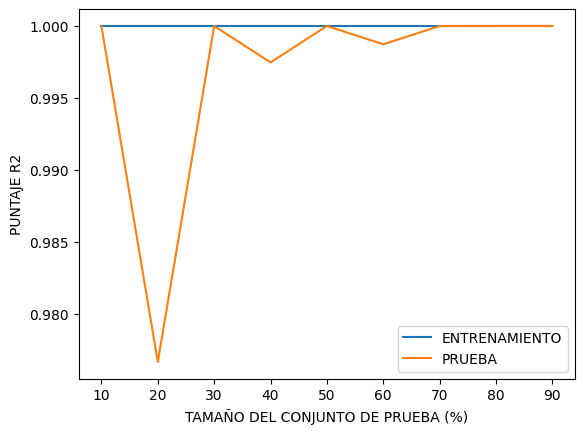

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(10, 100, 10), train_scores, label='ENTRENAMIENTO')
plt.plot(range(10, 100, 10), test_scores, label='PRUEBA')
plt.xlabel('TAMAÑO DEL CONJUNTO DE PRUEBA (%)')
plt.ylabel('PUNTAJE R2')
plt.legend()
plt.show()

# FIN DE MODELADO CON TODOS LOS DATOS

---

In [ ]:
print(variables_significativas)

['ANO', 'SUPSEM', 'SUPCOSE', 'SUPSINI', 'PRODTON', 'NMUN_Agua Prieta', 'NMUN_Alamos', 'NMUN_Altar', 'NMUN_Arizpe', 'NMUN_Bacadéhuachi', 'NMUN_Bacanora', 'NMUN_Bacerac', 'NMUN_Banámichi', 'NMUN_Baviácora', 'NMUN_Benjamín Hill', 'NMUN_Bácum', 'NMUN_Caborca', 'NMUN_Cajeme', 'NMUN_Cananea', 'NMUN_Cucurpe', 'NMUN_Cumpas', 'NMUN_Divisaderos', 'NMUN_Empalme', 'NMUN_Etchojoa', 'NMUN_Fronteras', 'NMUN_Gral. Plutarco Elías Calles', 'NMUN_Granados', 'NMUN_Guaymas', 'NMUN_Hermosillo', 'NMUN_Huachinera', 'NMUN_Huatabampo', 'NMUN_Magdalena', 'NMUN_Mazatán', 'NMUN_Moctezuma', 'NMUN_Nogales', 'NMUN_Opodepe', 'NMUN_Oquitoa', 'NMUN_Pitiquito', 'NMUN_Plutarco Elías Calles', 'NMUN_Rayón', 'NMUN_Rosario', 'NMUN_San Felipe de Jesús', 'NMUN_San Ignacio Río Muerto', 'NMUN_San Luis Río Colorado', 'NMUN_Santa Cruz', 'NMUN_Sáric', 'NMUN_Trincheras', 'NMUN_Ures', 'NMUN_Villa Hidalgo', 'NMUN_Villa Pesqueira', 'NMUN_Yécora', 'CULTIVO_Triticale grano', 'CDDR_139', 'CDDR_140', 'CDDR_141', 'CDDR_142', 'CDDR_143', 'CDD

In [ ]:
X_seleccionado

array([[1.9990e+03, 2.9000e+01, 2.9000e+01, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.9990e+03, 1.5267e+04, 1.5252e+04, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.9990e+03, 3.9258e+04, 3.7475e+04, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [2.0210e+03, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0210e+03, 1.1000e+02, 1.1000e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0210e+03, 5.0000e+01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [ ]:
y_pred_Mario = RLM.predict(testData2_scaled)

In [ ]:
dfAñosInc.columns

Index(['ANO', 'CICLO', 'CDDR', 'NMUN', 'CULTIVO', 'SUPSEM', 'SUPCOSE',
       'SUPSINI', 'PRODTON'],
      dtype='object')

In [ ]:
X_Prediccion_2022 = dfAñosInc.drop(['PRODTON', 'CDDR'], axis=1)

In [ ]:
X_Prediccion_2022

,ANO,CICLO,NMUN,CULTIVO,SUPSEM,SUPCOSE,SUPSINI
2430,2022,1,Altar,Trigo grano,126.0,126.0,0.0
2431,2023,1,Altar,Trigo grano,115.0,115.0,0.0
2432,2022,1,Átil,Trigo grano,23.0,23.0,0.0
2433,2023,1,Átil,Trigo grano,10.0,10.0,0.0
2434,2022,2,Caborca,Maíz grano,0.0,0.0,0.0
2435,2022,2,Caborca,Sorgo grano,0.0,0.0,0.0
2436,2022,1,Caborca,Trigo grano,622.0,622.0,0.0


In [ ]:
scaler = StandardScaler()
scaler.fit(X_Prediccion_2022)
X_scaled = scaler.transform(X_Prediccion_2022)
X_scaled

array([[-0.63245553, -0.63245553, -1.10782342,  0.50524673, -0.00963005,
        -0.00963005,  0.        ],
       [ 1.58113883, -0.63245553, -1.10782342,  0.50524673, -0.06259536,
        -0.06259536,  0.        ],
       [-0.63245553, -0.63245553, -0.59083916,  0.50524673, -0.50557788,
        -0.50557788,  0.        ],
       [ 1.58113883, -0.63245553, -0.59083916,  0.50524673, -0.56817323,
        -0.56817323,  0.        ],
       [-0.63245553,  1.58113883,  1.13244172, -2.3884391 , -0.61632351,
        -0.61632351,  0.        ],
       [-0.63245553,  1.58113883,  1.13244172, -0.13779456, -0.61632351,
        -0.61632351,  0.        ],
       [-0.63245553, -0.63245553,  1.13244172,  0.50524673,  2.37862354,
         2.37862354,  0.        ]])

In [ ]:
y_pred_2022_2023 = RLM.predict (X_scaled)

In [ ]:
print('Prediccion para 2022 = {}'.format(y_pred_2022))

Prediccion para 2022 = [7.46778219e+09]


In [ ]:
dfAñosInc['Predicción'] = y_pred_2022_2023

In [ ]:
dfAñosInc

,ANO,CICLO,CDDR,CMUN,CVECUL,SUPSEM,SUPCOSE,SUPSINI,PRODTON,Predicción
2430,2022,1,139,4,51,126.0,126.0,0.0,730.0,15695.804795
2431,2023,1,139,4,51,115.0,115.0,0.0,632.0,12492.432373
2432,2022,1,139,7,51,23.0,23.0,0.0,117.0,-47595.813205
2433,2023,1,139,7,51,10.0,10.0,0.0,55.0,-52035.184108
2434,2022,2,139,17,33,0.0,0.0,0.0,0.0,-61719.295506
2435,2022,2,139,17,47,0.0,0.0,0.0,0.0,-65763.885783
2436,2022,1,139,17,51,622.0,622.0,0.0,3700.0,323793.411259


In [ ]:
dfAñosInc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 2430 to 2436
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ANO         7 non-null      int64  
 1   CICLO       7 non-null      int64  
 2   CDDR        7 non-null      int64  
 3   CMUN        7 non-null      int64  
 4   CVECUL      7 non-null      int64  
 5   SUPSEM      7 non-null      float64
 6   SUPCOSE     7 non-null      float64
 7   SUPSINI     7 non-null      float64
 8   PRODTON     7 non-null      float64
 9   Predicción  7 non-null      float64
dtypes: float64(5), int64(5)
memory usage: 616.0 bytes


In [ ]:
X_datos_completos = dfDatosCompletos.drop(['PRODTON', 'CDDR'], axis=1)
y_datos_completos = dfDatosCompletos['PRODTON']

In [ ]:
scaler.fit(X_datos_completos)
X_scaled = scaler.transform(X_datos_completos)
X_scaled

array([[-2.02148737e+00, -1.08419095e+00, -1.63833920e+00, ...,
        -2.91978457e-01, -2.87609810e-01, -1.22169641e-01],
       [-2.02148737e+00, -1.08419095e+00, -8.98611667e-01, ...,
         1.18228636e+00,  1.18682058e+00, -8.43154495e-02],
       [-2.02148737e+00, -1.08419095e+00, -8.49296498e-01, ...,
         3.50339722e+00,  3.33923906e+00,  4.37743190e+00],
       ...,
       [ 1.62234278e+00, -1.08419095e+00,  1.46851643e+00, ...,
        -2.94784185e-01, -2.90418618e-01, -1.22169641e-01],
       [ 1.62234278e+00,  9.22346754e-01,  1.51783159e+00, ...,
        -2.84141770e-01, -2.79764519e-01, -1.22169641e-01],
       [ 1.62234278e+00, -1.08419095e+00, -5.04090318e-01, ...,
        -2.89946724e-01, -2.90418618e-01,  4.01099688e-03]])

In [ ]:
Pred_datos_completos = RLM.predict(X_scaled)

In [ ]:
dfDatosCompletos['Prediccion'] = Pred_datos_completos

In [ ]:
dfDatosCompletos

,ANO,CICLO,CDDR,CMUN,CVECUL,SUPSEM,SUPCOSE,SUPSINI,PRODTON,Prediccion
0,1999,1,141,2,51,29.0,29.0,0.0,86.00,-2819.888470
1,1999,1,139,17,51,15267.0,15252.0,15.0,109935.00,88267.193626
2,1999,1,148,18,33,39258.0,37475.0,1783.0,211524.00,221176.941946
3,1999,1,148,18,47,43.0,0.0,43.0,0.00,-1722.169120
4,1999,1,148,18,51,116200.0,116200.0,0.0,701141.00,689077.485316
...,...,...,...,...,...,...,...,...,...,...
2425,2021,1,140,64,51,314.5,314.5,0.0,2484.55,6939.035539
2426,2021,2,140,64,47,17.0,17.0,0.0,70.04,230.590037
2427,2021,1,139,65,51,0.0,0.0,0.0,0.00,5101.977015
2428,2021,2,142,66,47,110.0,110.0,0.0,254.30,853.162048
